## Text from image

In [42]:
from PIL import Image, ImageFilter, ImageColor
import pytesseract

**You need to install Tesseract-OCR before https://github.com/UB-Mannheim/tesseract/wiki**

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

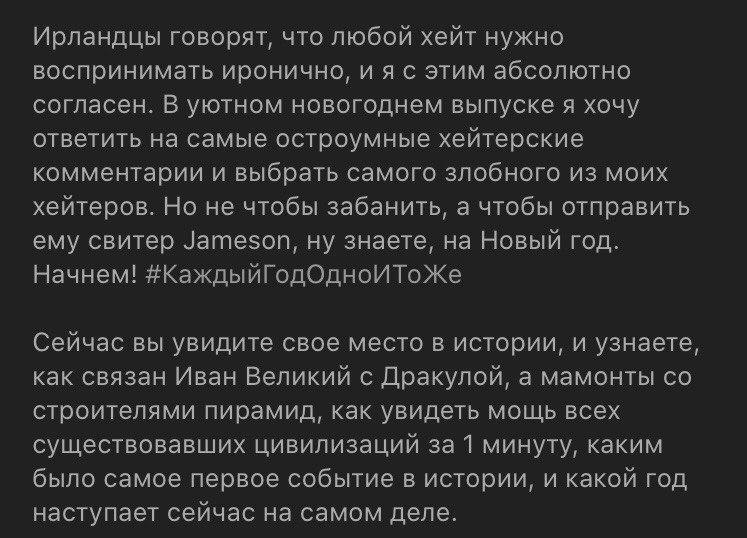

In [4]:
file = Image.open('test1.jpg')
im = file.convert('L')
im

In [8]:
text = pytesseract.image_to_string(im, lang='rus+eng+math')
print(text)

Ирландцы говорят, что любой хейт нужно
воспринимать иронично, ия с этим абсолютно
согласен. В уютном новогоднем выпуске я хочу
OTBETUTb Ha Cambie OCTpoyMHbie xeliTepcKue
комментарии и выбрать самого злобного из моих
хейтеров. Но не чтобы забанить, а чтобы отправить
ему свитер Jameson, ну знаете, Ha Новый год.
Начнем! #КаждыйГодОдноИТоЖжЖе

Сейчас вы увидите свое место в истории, и узнаете,
как связан Иван Великий с Дракулой, а мамонты со
строителями пирамид, как увидеть мощь всех
существовавших цивилизаций за 1 минуту, каким
6bINO0 Camoe NepBoe CobbITHe ее И Kako ron,
наступает сейчас на самом деле.


## Text from pdf

In [3]:
from io import StringIO
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage

In [65]:
def extract_text_from_pdf(pdf_path):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)

    with open(pdf_path, 'rb') as fh:
        for page in PDFPage.get_pages(fh, caching=True,
                                      check_extractable=True):
            page_interpreter.process_page(page)

        text = fake_file_handle.getvalue()

    converter.close()
    fake_file_handle.close()

    if text:
        return text

In [7]:
print(extract_text_from_pdf('doc1.pdf'))

Тестовый пдф документ бтв  Посмотрим как работает 


## Text from DOCX

In [11]:
import docx2txt

# extract text
# text = docx2txt.process("test.docx")

# extract text and write images
text = docx2txt.process("test.docx", "C:\\Users\\Fedor\\Documents\\Edu\\ComputerNetworks\\ComputerNetworks") 

## DOCX to PDF

In [61]:
import pypandoc

In [64]:
pypandoc.convert_file('test.docx',
                      'pdf',
                      outputfile="test.pdf",
                      extra_args=[
                          '-V', 'geometry:margin=1.5cm', '--pdf-engine',
                          'C:\\texlive\\2019\\bin\\win32\\xelatex.exe'
                      ])

''

## DOC to DOCX

In [ ]:
from glob import glob
import re
import os
import win32com.client as win32
from win32com.client import constants

# Create list of paths to .doc files
paths = glob('C:\\Windows\\System32\\InputData\\test1.doc', recursive=True)

def save_as_docx(path):
    # Opening MS Word
    word = win32.gencache.EnsureDispatch('Word.Application')
    doc = word.Documents.Open(path)
    doc.Activate ()

    # Rename path with .docx
    new_file_abs = os.path.abspath(path)
    new_file_abs = re.sub(r'\.\w+$', '.docx', new_file_abs)

    # Save and Close
    word.ActiveDocument.SaveAs(
        new_file_abs, FileFormat=constants.wdFormatXMLDocument
    )
    doc.Close(False)

for path in paths:
    save_as_docx(path)

## Images from PDF

In [35]:
import minecart

In [36]:
pdffile = open('test.pdf', 'rb')
doc = minecart.Document(pdffile)

page = doc.get_page(0) 
i = 0
for page in doc.iter_pages():
    for image in page.images:
        im = image.as_pil()
        im.save('OutputData\\' + str(i) + '.jpg') 
        i += 1
    